<a href="https://colab.research.google.com/github/SK-21438734/test/blob/main/BeeGeez_Business_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **BeeGeez Business Report**

BeeGeez is a retail company that operates globally, selling various products through both online and offline sales channels across multiple regions.







## ***`Highlights and Reports for the BeeGeez `***

## **Total revenue and total profit over time**

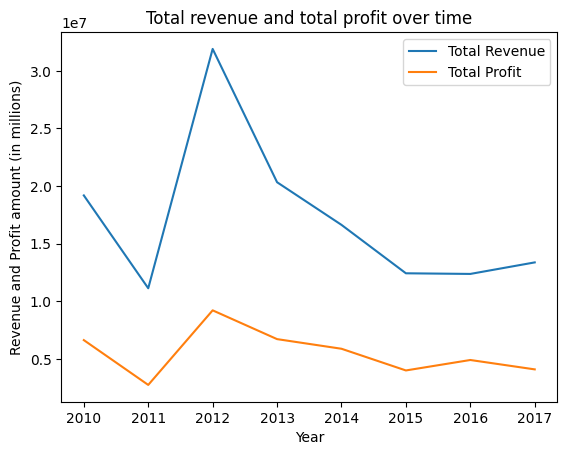

In [ ]:
# Import Libraries
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets

connection = sqlite3.connect('beegeez_sales_data_sqlite3.db')

cursor = connection.cursor()

# Displaying the schema of the databse
sql = "SELECT name from sqlite_master WHERE type='table';"
cursor.execute(sql)
tables = cursor.fetchall()

# Displaying the details of the tables
for table in tables:
  table_name = table[0]

sql = (f"PRAGMA table_info('{table_name}')")

cursor.execute(sql)
cursor.fetchall()

# Group A-1
# Extracting year from date and summing total revenue and profit by each year
sql='''
SELECT strftime('%Y', Order_Date) AS Year,
  sum(Total_Revenue) AS Total_Revenue,
  sum(Total_Profit) AS Total_Profit
FROM sales
GROUP BY Year
ORDER BY Year;
'''
# Load the date into a DataFrame
sales_yearly_df = pd.read_sql_query(sql, connection)
sales_yearly_df
sales_yearly_df.set_index('Year')

# Plotting the data as a line chart
plt.plot(sales_yearly_df.Year, sales_yearly_df.Total_Revenue, label="Total Revenue")
plt.plot(sales_yearly_df.Year, sales_yearly_df.Total_Profit, label="Total Profit")

# Adding lables and legend to the chart
plt.title('Total revenue and total profit over time')
plt.xlabel('Year')
plt.ylabel('Revenue and Profit amount (in millions)')
plt.legend()

# Displaying the line chart
plt.show()

The above line  graph illustrates the total revenue and total profit for BeeGeez from 2010 to 2017. The X axis represents the year and Y axis represents the revenue and profit amount. Amount is measured in terms of millions. The blue and orange line represents the total revenue and total profit respectively.

Looking at the trend of total revenue and total profit over time for BeeGeez, there was downfall at the beginning reaching the lowest of all time at 2011. However, there was exponential increase maintaing the highest record of all time in 2012. Then both the revenue and profit seems to have downfall till 2015. There is slight increase in 2016 and again decrease in 2017 in terms of total profit. But, for the revenue, there is no significant change in 2016 and slightly increase in 2017. Overall, it can be observed that profit goes in the same direction to revenue, if profit increase revenue is also increasing and vice versa except in 2016-2017.

## **Total revenue and profit generated by Product**

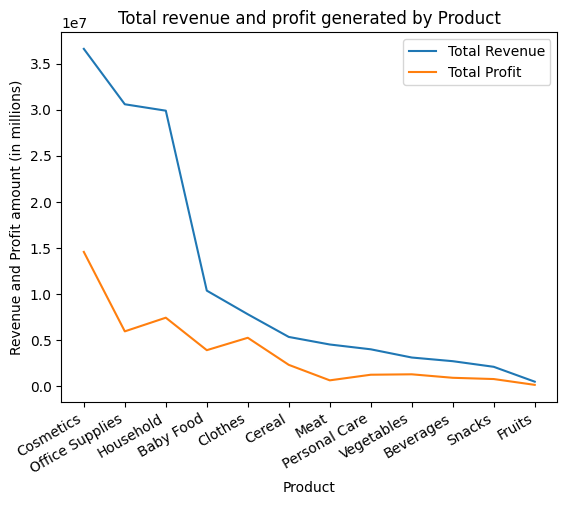

In [ ]:
# Group A-2
# Extracting total revenue and profit by product
sql='''
SELECT Item_Type,
  sum(Total_Revenue) as Total_Revenue,
  sum(Total_Profit) as Total_Profit
FROM sales
GROUP By Item_Type
ORDER BY Item_Type
'''
# Load the data into a DataFrame
sales_product_df = pd.read_sql_query(sql, connection)
sorted_sales_product_df = sales_product_df.sort_values(['Total_Revenue'], ascending=False)
sorted_sales_product_df

# Group A-2
# Plotting the data as a line chart
plt.plot(sorted_sales_product_df.Item_Type, sorted_sales_product_df.Total_Revenue, label="Total Revenue")
plt.plot(sorted_sales_product_df.Item_Type, sorted_sales_product_df.Total_Profit, label="Total Profit")

# Adding lables and legend to the chart
plt.title('Total revenue and profit generated by Product')
plt.xlabel('Product')
plt.ylabel('Revenue and Profit amount (in millions)')
plt.legend()

# Rotating the x-axis labels at 30 degress
# REFERENCE - https://www.geeksforgeeks.org/how-to-plot-a-time-series-in-matplotlib/
plt.xticks(rotation=30, ha='right')

# Displaying the line chart
plt.show()

The above line graph illustrates the total revenue and total profit for BeeGeez generated by different products. The X axis represents the variety of products and Y axis represents the revenue and profit amount. Amount is measured in terms of millions. The blue and orange line represents the total revenue and total profit respectively.

The highest contribution in total revenue and total profit was made by the cosmetics while fruits contributed the least. There is similar kind of revenue and profit generated by the meat, personal care, vegetables, beverages and snacks.

In the graph, it can be clearly observe that, there is more profit in other materialistic consumption like cosmetics, office supplies, household than the food and beverage items.

## **Total revenue and profit by sales channel and region**

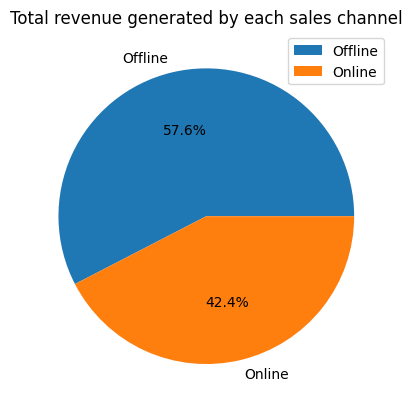

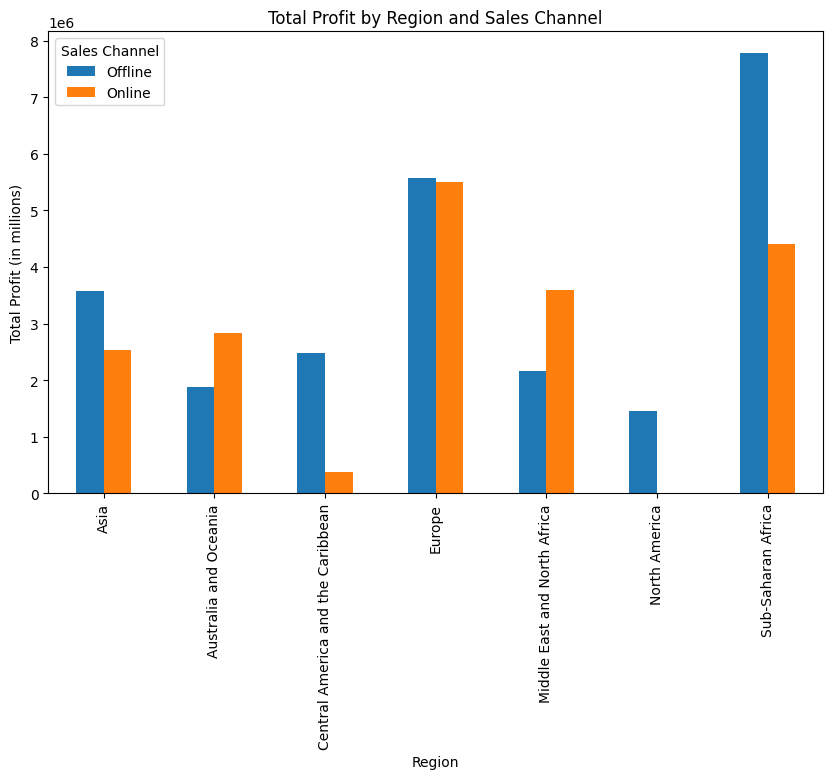

In [ ]:
# Group B-2
# SQL to extract relevant columns from Sales table
sql='''
SELECT  Region, Sales_Channel, Total_Revenue, Total_Profit FROM sales
'''
# Load the data into a DataFrame
sales_df = pd.read_sql_query(sql, connection)
#sales_df

# Group B-2.1
# Calculate Total_Revenue by Sales Channel
sales_item_df = sales_df.groupby('Sales_Channel').aggregate({'Total_Revenue':'sum'})

# Plot the data as a pie chart
sales_item_df.plot(y='Total_Revenue', kind='pie', autopct='%1.1f%%')

# Add title and labels
plt.title('Total revenue generated by each sales channel')
plt.ylabel('')

# Show the plot
plt.show()

print('\n\n')
# Group B-2.2
# Group the data by region and sales channel, and calculate the sum of total profit
grouped_df = sales_df.groupby(['Region', 'Sales_Channel']).aggregate({'Total_Profit':'sum'})

# Reset the index to have region and sales channel as separate columns
grouped_df = grouped_df.reset_index()

# Pivot the DataFrame to have sales channels as columns
pivot_df = grouped_df.pivot(index='Region', columns='Sales_Channel', values='Total_Profit')

# Plot the grouped bar graph
pivot_df.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Region')
plt.ylabel('Total Profit (in millions)')
plt.title('Total Profit by Region and Sales Channel')
plt.legend(title='Sales Channel')

plt.show()

The pie chart illustrates the proportion of revenue generated by each sales channel for BeeGeez.The blue color represents the revenue generated by offline sales channel while orange represents for the online. It is cleary observed that offline channels has more contribution in revenue than that from online.


The bar chart represents the total profit on different regions by different sales channel. The profit is calculated in million. The X axis represents the different regions while Y axis is the representation of total profit. Similarly, the blue color is the indication for offline and orange for online.

Overall, the highest profit from online sales is in Europe, followed by Sub-Saharan Africe and it is slightly low than the revenue from offline. Then, the collection of profit in online by Middle East and North Africa is higher than from the Asia, and Australia and Oceania. However, the total profit on Central America and Caribbean is low and in North-America, there is no profit from offline sales, which we can assume that there is no offline sales.

Moving to offline sales channel, the highest profit is on Sub-Saharan Africa followed by Europe and Asia respectively. The least profit is made on North America. However, Central America and the Caribbean, Middle East and North Africa and Australia and Ocenia have similar range of profit.

## **In Summary:**



1.   Highest total profit and total revenue over time :2012

2.   Lowest total profit and total revenue over time :2011

1.   Highest total revenue and profit is generated by cosmetics
2.   Lowest total revenue and profit is generated by fruits.

1.   In overall, offline sales channel generate more revenue than the online sales channel.
2.   The highest profit is in Sub-Saharan Africe by offline sales and in Europe by online sales.

1.   The least profit is in North America by offline sales and in Central America and the Carribean by online sales.










# ***Limitations:***

While analyzing the data, different factors were not taken into considered. For instance, in the analysis of total revenue and total profit over time, the sales channel, region business have been involved has been overlooked. Similarly, while analysis of total revenue and profit by different items, numbers of quantity has not been taken into consideration. In addition, we have not consider the market share of different regions that BeeGeez has covered. Thus, neglecting these factors the results may not be that accurate and can miss the major findings.